In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from astropy.io import fits
import pickle

In [5]:
science_list = np.genfromtxt('science.list', dtype=str)
print(len(science_list))

2161


In [29]:
median_bias = pickle.load(open('../bias/median_bias.p', 'rb'))
median_bias_error = 1.8919885899451057
normalized_flat = pickle.load(open('../flat/median_flat.b', 'rb'))
normalized_flat_err = pickle.load(open('../flat/median_flat_err.b', 'rb'))
readout_noise = 7.1
gain = 1.91

In [30]:
science_fits = fits.open(science_list[0])
science_hdu = science_fits[0]
science_data = science_hdu.data * gain - median_bias

<IPython.core.display.Javascript object>


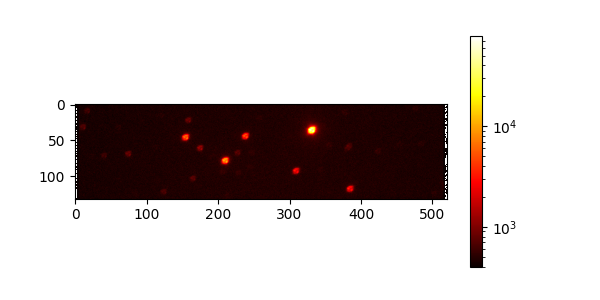

In [36]:
import matplotlib.colors as colors
plt.figure(figsize=(6,3))
im1 = plt.imshow(science_data,
                cmap=plt.cm.get_cmap('hot'),
                norm=colors.LogNorm(vmin=400, vmax=science_data.max())
                )
plt.colorbar(im1)
plt.show()

In [40]:
#Compute the error of the debiased science data.
science_debiased = science_hdu.data * gain - median_bias
science_debiased_err = np.sqrt( science_debiased + readout_noise**2 + median_bias_error**2 )

In [47]:
#Corrected debiased science data
science_corr = science_debiased / normalized_flat
science_corr_err = science_corr * np.sqrt(
    (science_debiased_err/science_debiased)**2 +
    (normalized_flat_err/normalized_flat)**2 )

/tmp/ipykernel_5055/3787199956.py:1: RuntimeWarning: divide by zero encountered in divide
  science_corr = science_debiased / normalized_flat
/tmp/ipykernel_5055/3787199956.py:1: RuntimeWarning: invalid value encountered in divide
  science_corr = science_debiased / normalized_flat
/tmp/ipykernel_5055/3787199956.py:3: RuntimeWarning: divide by zero encountered in divide
  (science_debiased_err/science_debiased)**2 +
/tmp/ipykernel_5055/3787199956.py:4: RuntimeWarning: divide by zero encountered in divide
  (normalized_flat_err/normalized_flat)**2 )
/tmp/ipykernel_5055/3787199956.py:2: RuntimeWarning: invalid value encountered in multiply
  science_corr_err = science_corr * np.sqrt(


In [48]:
#Apply it to all the images, creating a loop:
import bz2 #to save some space

array_jd = np.empty(len(science_list))
array_airmass = np.empty(len(science_list))
array_exptime = np.empty(len(science_list))

for i_science, science_name in enumerate(science_list):
    
    science_fits = fits.open(science_name)
    science_hdu = science_fits[0]
    
    array_jd[i_science] = science_hdu.header['JD']
    array_airmass[i_science] = science_hdu.header['AIRMASS']
    array_exptime[i_science] = science_hdu.header['EXPTIME']
    
    science_debiased = science_hdu.data * gain - median_bias
    science_debiased_err = np.sqrt( science_debiased + readout_noise**2 + median_bias_error**2 )
    
    science_corr = science_debiased / normalized_flat
    science_corr_err = science_corr * np.sqrt(
        (science_debiased_err/science_debiased)**2 +
        (normalized_flat_err/normalized_flat)**2 )
    
    science_fits.close()
    
    pickle.dump(science_corr.astype(np.single),
               bz2.BZ2File('science_corr/' + science_name[:-5] + '_corr.bz2', 'wb' ) )
    pickle.dump(science_corr_err.astype(np.single),
               bz2.BZ2File('science_corr/' + science_name[:-5] + '_corr_err.bz2', 'wb' ) )
    
    

/tmp/ipykernel_5055/3829583952.py:19: RuntimeWarning: divide by zero encountered in divide
  science_corr = science_debiased / normalized_flat
/tmp/ipykernel_5055/3829583952.py:19: RuntimeWarning: invalid value encountered in divide
  science_corr = science_debiased / normalized_flat
/tmp/ipykernel_5055/3829583952.py:21: RuntimeWarning: divide by zero encountered in divide
  (science_debiased_err/science_debiased)**2 +
/tmp/ipykernel_5055/3829583952.py:22: RuntimeWarning: divide by zero encountered in divide
  (normalized_flat_err/normalized_flat)**2 )
/tmp/ipykernel_5055/3829583952.py:20: RuntimeWarning: invalid value encountered in multiply
  science_corr_err = science_corr * np.sqrt(


In [6]:
#Note: Repetition of some elements of the previous cell.

import bz2

array_jd = np.empty(len(science_list))
array_airmass = np.empty(len(science_list))
array_exptime = np.empty(len(science_list))

for i_science, science_name in enumerate(science_list):
    
    science_fits = fits.open(science_name)
    science_hdu = science_fits[0]
    
    array_jd[i_science] = science_hdu.header['JD']
    array_airmass[i_science] = science_hdu.header['AIRMASS']
    array_exptime[i_science] = science_hdu.header['EXPTIME']
    
    science_fits.close()

In [7]:
pickle.dump(array_airmass, open("array_airmass.p", "wb"))
pickle.dump(array_jd, open("array_jd.p", "wb"))
pickle.dump(array_exptime, open("array_exptime.p", "wb"))